# Multimessenger - Supernova

## Refactor

I refactored the code to work more efficiently and to be more modular so that it can be integrated into different studies smoothly. <br>

Main difference is now there are different classes handling different tasks. <br>
 - `snax.Supernova_Models` handles only the models and fluxes
 - `snax.Nucleus` creates a Xenon atom, pure or isotope, computes cross sections
 - `snax.interactions` accepts a model, and creates a nuclei to handle the interactions.

### Models
Let's have a look at the Supernova Models

In [6]:
import numpy as np
import astropy.units as u
import snewpy

In [7]:
from snewpy.neutrino import Flavor
from snax.Supernova_Models import Models
from snax.Plotter import Plotter
from snax.interactions import Interactions
from astropy import units as u
from snewpy.models.ccsn import Bollig_2016, Analytic3Species, Fornax_2021, Nakazato_2013

## On Local Machine

We create a local `mma_folder` and create a local temporary configuration file to work locally.

In [8]:
import configparser
import os

if not os.path.isdir("mma_data"):
    os.mkdir("mma_data")
    
if not os.path.isfile("mma_data/temp_config.config"):
    config = configparser.ConfigParser()
    config['paths'] = {'snewpy_models': './mma_data/SNEWPY_models/',
                       'processed_data': './mma_data/',}
    config['wfsim'] = {'instruction_path': './mma_data/',
                       'sim_folder': './mma_data/',}
    with open('./mma_data/temp_config.config', 'w') as configfile:
        config.write(configfile)
    print(f"Created mma_data/temp_config.config")
    print("Either save the snewpy models you want under mma_data/SNEWPY_models/ or change the path in the config")
print("You can use `snewpy.get_models(models=['Bollig_2016', 'Nakazato_2013'], download_dir='mma_data')`")

You can use `snewpy.get_models(models=['Bollig_2016', 'Nakazato_2013'], download_dir='mma_data')`


In [14]:
# snewpy.get_models(models=['Fornax_2021'], download_dir='mma_data')

In [46]:
!ls ./mma_data/SNEWPY_models/

Bollig_2016  Fornax_2021  Nakazato_2013


In [10]:
snewpy_models_path = "./mma_data/SNEWPY_models/"

In [16]:
# snewpy model
_N13_m13 = Nakazato_2013(filename=snewpy_models_path+"Nakazato_2013/nakazato-shen-z0.004-t_rev100ms-s13.0.fits")
N13_m13 = Models(_N13_m13, save_name='N13_m13', config_file="temp_config.config")
# compute/fetch fluxes
N13_m13.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200), force=False)
N13_m13.scale_fluxes(distance=10);
# interactions
Int_N13 = Interactions(N13_m13, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_N13.compute_interaction_rates()                                                           # compute rates
Int_N13.scale_rates(distance=10, volume=5.9);  # scale rates for dist & vol
############################################
# snewpy model
_N13_m50 = Nakazato_2013(filename=snewpy_models_path+"Nakazato_2013/nakazato-shen-z0.004-t_rev100ms-s50.0.fits")
N13_m50 = Models(_N13_m50, save_name='N13_m50', config_file="temp_config.config")
# compute/fetch fluxes
N13_m50.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200), force=False)
N13_m50.scale_fluxes(distance=10);
# interactions
Int_N50 = Interactions(N13_m50, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_N50.compute_interaction_rates()                                                           # compute rates
Int_N50.scale_rates(distance=10, volume=5.9);  # scale rates for dist & vo
############################################
# snewpy model
_N13_BHshen = Nakazato_2013(filename=snewpy_models_path+"Nakazato_2013/nakazato-shen-BH-z0.004-s30.0.fits")
N13_BHshen = Models(_N13_BHshen, save_name='N13_BHshen', config_file="temp_config.config")
# compute/fetch fluxes
N13_BHshen.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200), force=False)
N13_BHshen.scale_fluxes(distance=10);
# interactions
Int_BHshen = Interactions(N13_BHshen, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_BHshen.compute_interaction_rates()                                                           # compute rates
Int_BHshen.scale_rates(distance=10, volume=5.9);  # scale rates for dist & v
############################################
# snewpy model
_N13_BHLS220 = Nakazato_2013(filename=snewpy_models_path+"Nakazato_2013/nakazato-LS220-BH-z0.004-s30.0.fits")
N13_BHLS220 = Models(_N13_BHLS220, save_name='N13_BHLS220', config_file="temp_config.config")
# compute/fetch fluxes
N13_BHLS220.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200), force=False)
N13_BHLS220.scale_fluxes(distance=10);
# interactions
Int_BHLS220 = Interactions(N13_BHLS220, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_BHLS220.compute_interaction_rates()                                                           # compute rates
Int_BHLS220.scale_rates(distance=10, volume=5.9);  # scale rates for dist & v

> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
> Saved at <self.storage>/N13_m13.pkl!



Looping:   0%|          | 0/391 [00:00<?, ?it/s]

> Saved at <self.storage>/N13_m13.pkl!

> Saved at <self.storage>/N13_m13_interaction.pickle!



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)
> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
> Saved at <self.storage>/N13_m50.pkl!



Looping:   0%|          | 0/391 [00:00<?, ?it/s]

> Saved at <self.storage>/N13_m50.pkl!

> Saved at <self.storage>/N13_m50_interaction.pickle!



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)
> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
> Saved at <self.storage>/N13_BHshen.pkl!



Looping:   0%|          | 0/8854 [00:00<?, ?it/s]

> Saved at <self.storage>/N13_BHshen.pkl!

> Saved at <self.storage>/N13_BHshen_interaction.pickle!



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)
> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
> Saved at <self.storage>/N13_BHLS220.pkl!



Looping:   0%|          | 0/4644 [00:00<?, ?it/s]

> Saved at <self.storage>/N13_BHLS220.pkl!

> Saved at <self.storage>/N13_BHLS220_interaction.pickle!



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)


In [47]:
_B16_m11 = Bollig_2016(filename=snewpy_models_path+"Bollig_2016/s11.2c")
B16_m11 = Models(_B16_m11, save_name='B16_m11', config_file="temp_config.config")
B16_m11.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200))
B16_m11.scale_fluxes(distance=10)
Int_B11 = Interactions(B16_m11, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_B11.compute_interaction_rates()                                                           # compute rates
Int_B11.scale_rates(distance=10, volume=5.9)  # scale rates for dist & vol
#####################################
_B16_m27 = Bollig_2016(filename=snewpy_models_path+"Bollig_2016/s27.0c")
B16_m27 = Models(_B16_m27, save_name='B16_m27', config_file="temp_config.config")
B16_m27.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200))
B16_m27.scale_fluxes(distance=10);
Int_B27 = Interactions(B16_m27, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_B27.compute_interaction_rates()                                                           # compute rates
Int_B27.scale_rates(distance=10, volume=5.9);  # scale rates for dist & vol

> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
>>>>> B16_m11.pkl
> Retrieving object self.storageB16_m11.pkl
Fluxes already exist in `self.fluxes`, and force=False, doing nothing.
> Retrieving object self.storage/B16_m11_interaction.pickle


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)
> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
>>>>> B16_m27.pkl
> Retrieving object self.storageB16_m27.pkl
Fluxes already exist in `self.fluxes`, and force=False, doing nothing.
> Retrieving object self.storage/B16_m27_interaction.pickle


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)


In [48]:
_F21_m13 = Fornax_2021(filename=snewpy_models_path+"Fornax_2021/lum_spec_13M_r10000_dat.h5")
F21_m13 = Models(_F21_m13, save_name='F21_m13', config_file="temp_config.config")
F21_m13.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200))
F21_m13.scale_fluxes(distance=10)
Int_F13 = Interactions(F21_m13, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_F13.compute_interaction_rates()                                                           # compute rates
Int_F13.scale_rates(distance=10, volume=5.9);  # scale rates for dist & vol
###############################################
_F21_m27 = Fornax_2021(filename=snewpy_models_path+"Fornax_2021/lum_spec_26.99M_r10000_dat.h5")
F21_m27 = Models(_F21_m27, save_name='F21_m27', config_file="temp_config.config")
F21_m27.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200))
F21_m27.scale_fluxes(distance=10)
Int_F27 = Interactions(F21_m27, Nuclei='Xenon', isotope='mix')                          # create interactions
Int_F27.compute_interaction_rates()                                                           # compute rates
Int_F27.scale_rates(distance=10, volume=5.9);  # scale rates for dist & vol

> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
> Saved at <self.storage>/F21_m13.pkl!



Looping:   0%|          | 0/4869 [00:00<?, ?it/s]

> Saved at <self.storage>/F21_m13.pkl!

> Saved at <self.storage>/F21_m13_interaction.pickle!



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)
> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
> Saved at <self.storage>/F21_m27.pkl!



Looping:   0%|          | 0/4916 [00:00<?, ?it/s]

> Saved at <self.storage>/F21_m27.pkl!

> Saved at <self.storage>/F21_m27_interaction.pickle!



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

> Computed the total rates at the source for 1 atom (not scaled)


## On dali/midway

In [17]:
# # default config (ie. SN_Nakazato.default_conf_path) already points to common storages
# # snewpy model
# _N13_m13 = Nakazato_2013(filename=snewpy_models_path+"Nakazato_2013/nakazato-shen-z0.004-t_rev100ms-s13.0.fits")
# N13_m13 = Models(_N13_m13, save_name='N13_m13')
# # compute/fetch fluxes
# N13_m13.compute_model_fluxes(neutrino_energies=np.linspace(0, 30, 200), force=False)
# N13_m13.scale_fluxes(distance=10);
# # interactions
# Int_N13 = Interactions(N13_m13, Nuclei='Xenon', isotope='mix')                          # create interactions
# Int_N13.compute_interaction_rates()                                                           # compute rates
# Int_N13.scale_rates(distance=10, volume=5.9);

## Check out the models and the interactions

We loaded a snewpy model and created a SNAX model from that, using this we also generated an interaction object.

In [23]:
# snewpy object
_N13_m13

**Nakazato_2013 Model**: nakazato-shen-z0.004-t_rev100ms-s13.0.fits

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $13$ $\mathrm{M_{\odot}}$|
|EOS | SHEN |
|Metallicity | 0.004 |
|Revival time | $100$ $\mathrm{ms}$|

In [25]:
# SNAX model
N13_m13

**Nakazato_2013 Model**: nakazato-shen-z0.004-t_rev100ms-s13.0.fits

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $13$ $\mathrm{M_{\odot}}$|
|EOS | SHEN |
|Metallicity | 0.004 |
|Revival time | $100$ $\mathrm{ms}$|
|file name| N13_m13.pkl
|duration | 20.05 s|
|time range| (-0.05 s, 20.0 s)

In [26]:
N13_m13.storage, N13_m13.user, N13_m13.model_name, N13_m13.object_name

('/mnt/c/Users/bj7780/Desktop/Kara/GitHub/XENON/multimessenger/notebooks',
 'kara-unix',
 'loaders',
 'N13_m13.pkl')

In [28]:
# interaction object
Int_N13

**Nakazato_2013 Model**: nakazato-shen-z0.004-t_rev100ms-s13.0.fits

|Parameter|Value|
|:--------|:----:|
|Progenitor mass | $13$ $\mathrm{M_{\odot}}$|
|EOS | SHEN |
|Metallicity | 0.004 |
|Revival time | $100$ $\mathrm{ms}$|
|file name| N13_m13.pkl
|duration | 20.05 s|
|time range| (-0.05 s, 20.0 s)
|Interaction file| N13_m13_interaction.pickle
|Target | mix Xenon
|Computed, scaled | True, True
|distance | 10.0 kpc
|volume | 5.9 t
|Expected Total | 73 ct

In [33]:
Int_N13.interaction_file, Int_N13.volume, Int_N13.distance, Int_N13.expected_total['Total']

('N13_m13_interaction.pickle',
 <Quantity 5.9 t>,
 <Quantity 10. kpc>,
 <Quantity 73.30905244 ct>)

- We can now compute the fluxes and scale them at any distance. 

In [35]:
Int_N13.scale_rates(distance=7, volume=50);
Int_N13.interaction_file, Int_N13.volume, Int_N13.distance, Int_N13.expected_total['Total']

('N13_m13_interaction.pickle',
 <Quantity 50. t>,
 <Quantity 7. kpc>,
 <Quantity 1267.88399246 ct>)

## Look at the models

In [49]:
models_list = [N13_m13, N13_m50, N13_BHshen, N13_BHLS220, B16_m11, B16_m27, F21_m13, F21_m27]
interactions_list = [Int_N13, Int_N50, Int_BHshen, Int_BHLS220, Int_B11, Int_B27, Int_F13, Int_F27]

models = {i.object_name:i for i in models_list}
interactions = {i.Model.object_name:i for i in interactions_list}

In [52]:
import matplotlib.pyplot as plt

(5e-06, 44.00322447797172)

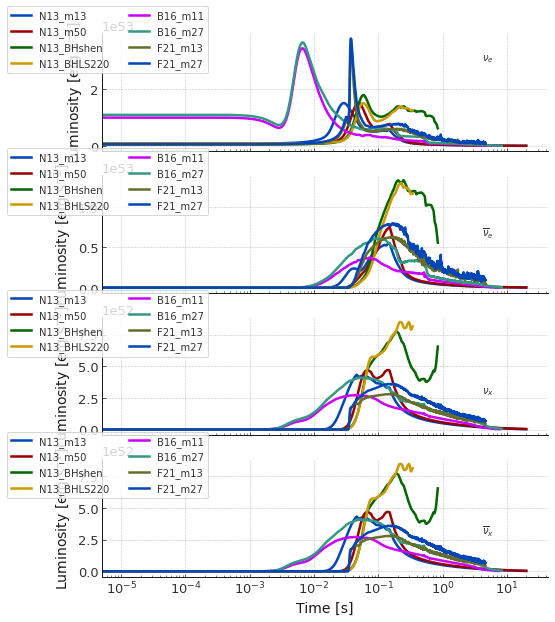

In [53]:
fig, axes = plt.subplots(nrows=4, figsize=(8,10), sharex=True)

for i, f in enumerate(Flavor):
    axes[i].set_ylabel('Luminosity [erg s$^{-1}$]')
    axes[i].set_xscale('log')
    for k,v in models.items():
        l = axes[i].plot(v.times, v.model.luminosity[f], label=k.split('.')[0])
    axes[i].legend(fontsize=10, ncol=2, bbox_to_anchor=(0.25, 0.62));
    axes[i].text(0.9*np.max(v.times.value), 0.8*np.max(v.model.luminosity[f].value), f.to_tex())
    
axes[-1].set_xlabel('Time [s]');
axes[-1].set_xlim(5e-6, None)